## Perceptron algorithm 

The perceptron is a simple supervised machine learning algorithm and one of the earliest **neural network** architectures. It was introduced by Rosenblatt in the late 1950s, and was made a series of theoretical studies by Novikoff, Minsky and Papert. A perceptron represents a **binary linear classifier** that maps a set of training examples (of $n$ dimensional input vectors) onto binary values using a $n-1$ dimensional hyperplane.

The perceptron as follows.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $n-$dimensional vector $\boldsymbol x^{(i)} = (x^{(i)}_1, ..., x^{(i)}_n)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{-1,1\}$

The perceptron is a very simple neural network:
- it has a loss function 
$$L(\boldsymbol{w}, b) = - \sum_{\boldsymbol{x^{(i)}} \in M} (y^{(i)}(\boldsymbol{w} \cdot \boldsymbol{x^{(i)}} + b))$$
  where $M$ represents a set of misclassification point and $\cdot$ denotes the dot product
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(n)})$
- it has a real-valued bias $b$
- it uses the Heaviside step function as its activation function

* * *
A perceptron is to find the parameters $\boldsymbol{w}$ and $b$ to solve the minimization of the loss function: 
$$\min_{\boldsymbol{w},b}L(\boldsymbol{w}, b) = - \sum_{\boldsymbol{x^{(i)}} \in M} (y^{(i)}(\boldsymbol{w} \cdot \boldsymbol{x^{(i )}} + b))$$
It trained using **stochastic gradient descent**:
$$\nabla_{\boldsymbol {w}} L(\boldsymbol{w}, b) =  - \sum_{\boldsymbol{x^{(i)}} \in M} (y^{(i)} \boldsymbol{x^{(i )}})$$

$$\nabla_{b} L(\boldsymbol{w}, b) =  - \sum_{\boldsymbol{x^{(i)}} \in M} y^{(i)}$$
The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Input: $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$; learning rate $\eta  (0 < \eta \leq 1)$

**Output: $\boldsymbol{w}$, $b$; Perceptron Model $f(\boldsymbol{x}) = sign(\boldsymbol{w} \cdot \boldsymbol{x} + b)$

**Step 0: ** Initialize the weight vector and bias with zeros (or small random values).
* * *

**Step 1: **Select $(\boldsymbol{x}^{(i)}, y^{(i)})$  randomly from the dataset.
* * *

**Step 2: ** If $y_i(\boldsymbol{w} \cdot \boldsymbol{x_i} + b) \le 0 $, update the weights and bias.

$$\boldsymbol{w} \gets \boldsymbol{w} + \eta y^{(i)}\boldsymbol{x^{(i)}}$$

$$b \gets b  + \eta y^{(i)}$$
where $\eta  (0 < \eta \leq 1)$ is the learning rate.
***

**Step 3: ** Goto Step 2, until there is none misclassfication data in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Dataset

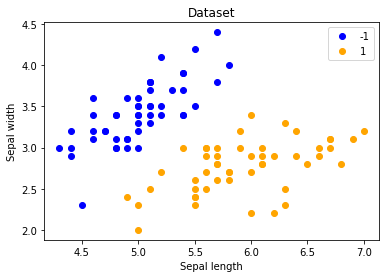

In [2]:
iris = load_iris()

#X is data, y is label#
X = iris.data[:100,:2]
y = iris.target[:100]
y = np.array([1 if i ==1 else -1 for i in y])

plt.plot(X[:50,0], X[:50,1], 'bo', color = 'blue', label = '-1')
plt.plot(X[50:100,0], X[50:100,1], 'bo', color = 'orange', label = '1')
plt.title("Dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()

In [3]:
print(f'Shape X: {X.shape}')
print(f'Shape y: {y.shape}')

Shape X: (100, 2)
Shape y: (100,)


## Perceptron model class

In [4]:
class Perceptron():

    def __init__(self):
        
        #Step 0: Initialize the paramaters
        self.w = np.zeros(len(X[0]), dtype = np.float32)
        self.b = 0
        self.learning_rate = 0.1
        
    def sign(self, x, w, b):
        y = np.dot(x, w) + b    #Identify misclassification data
        return y
    
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                #Step 2: Select the data fron dataset
                X = X_train[d]
                y = y_train[d]
                #Step 3: Stochastic gradient descent
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.learning_rate * np.dot(y, X)
                    self.b = self.b + self.learning_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Peceptron Model!'

## Initialization and training the model

In [5]:
p = Perceptron()
p.fit(X, y)

'Peceptron Model!'

## Perceptron model function

In [6]:
sepal_length = np.linspace(4, 7, 10)
sepal_width = -(p.w[0] * sepal_length + p.b) / p.w[1]

## Visualize decision boundary

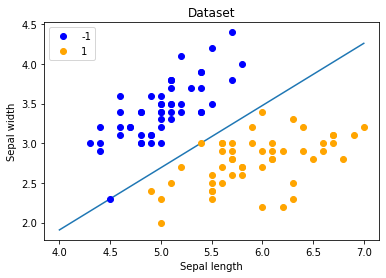

In [7]:
plt.plot(sepal_length, sepal_width)
plt.plot(X[:50,0], X[:50,1], 'bo', color = 'blue', label = '-1')
plt.plot(X[50:100,0], X[50:100,1], 'bo', color = 'orange', label = '1')
plt.title("Dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()